<a href="https://colab.research.google.com/github/mirandaqiqi1219/movie_recommendation/blob/master/Movie_Recommendation_with_Collaborative_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Ingest

In [0]:
#data source: https://www.kaggle.com/c/movie/data
import pandas as pd
df = pd.read_csv('/content/training_ratings_for_kaggle_comp.csv')
df.head()

,user,movie,rating,id
0,2783,1253,5,2783_1253
1,2783,589,5,2783_589
2,2783,1270,4,2783_1270
3,2783,1274,4,2783_1274
4,2783,741,5,2783_741


In [0]:
movie_name = pd.read_csv("/content/movies_name.csv")
movie_name.head()

,movie,names
0,1,1::Toy Story (1995)::Animation|Children's|Comedy
1,2,2::Jumanji (1995)::Adventure|Children's|Fantasy
2,3,3::Grumpier Old Men (1995)::Comedy|Romance
3,4,4::Waiting to Exhale (1995)::Comedy|Drama
4,5,5::Father of the Bride Part II (1995)::Comedy


In [0]:
#merge movie name table and df
with_movie_name = pd.merge(df, movie_name, on='movie')
with_movie_name.head()

,user,movie,rating,id,names
0,2783,1253,5,2783_1253,"1253::Day the Earth Stood Still, The (1951)::D..."
1,2788,1253,4,2788_1253,"1253::Day the Earth Stood Still, The (1951)::D..."
2,2789,1253,4,2789_1253,"1253::Day the Earth Stood Still, The (1951)::D..."
3,2794,1253,5,2794_1253,"1253::Day the Earth Stood Still, The (1951)::D..."
4,2795,1253,4,2795_1253,"1253::Day the Earth Stood Still, The (1951)::D..."


###Data Cleaning

In [0]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500100 entries, 0 to 500099
Data columns (total 4 columns):
user      500100 non-null int64
movie     500100 non-null int64
rating    500100 non-null int64
id        500100 non-null object
dtypes: int64(3), object(1)
memory usage: 19.1+ MB


In [0]:
#convert all type into int
df[['id']] = df[['id']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500100 entries, 0 to 500099
Data columns (total 4 columns):
user      500100 non-null int64
movie     500100 non-null int64
rating    500100 non-null int64
id        500100 non-null int64
dtypes: int64(4)
memory usage: 19.1 MB


In [0]:
df.head()

,user,movie,rating,id
0,2783,1253,5,27831253
1,2783,589,5,2783589
2,2783,1270,4,27831270
3,2783,1274,4,27831274
4,2783,741,5,2783741


In [0]:
#define whether need to trim the data
print('Original Shape: {}'.format(df.shape))

Original Shape: (500100, 4)


###movie name

##EDA

In [0]:
#count the rating number of each movie
movie = df[['movie','rating']].groupby(['movie']).agg(['mean', 'count'])
#movie = movie.rename(columns={ movie.columns[1]: "" })
movie.columns = ['mean', 'total_number'] + movie.columns[2:].tolist()
movie = movie.reset_index()
movie.head()

,movie,mean,total_number
0,1,4.146630,1098
1,2,3.230769,364
2,3,2.977401,177
3,4,2.770833,96
4,5,2.960526,152


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



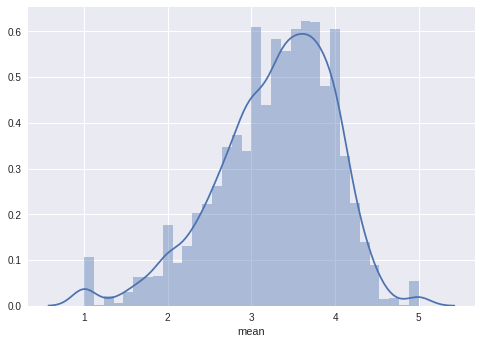

In [0]:
#plot the distribution of the movie ratings
import seaborn as sns
sns.set(color_codes=True)
sns.distplot(movie['mean'])

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



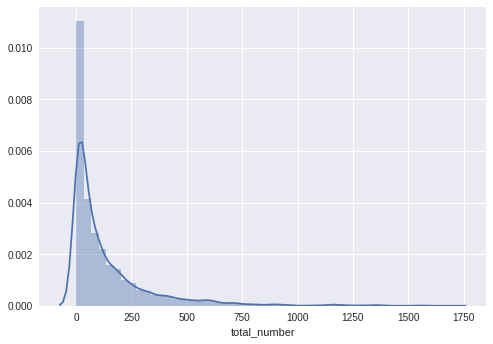

In [0]:
#distribution of amount of movie ratings
sns.distplot(movie['total_number'])

##Modeling

###Recommend with Collaborative Filtering

In [0]:
from surprise import Reader, Dataset, SVD, evaluate
#Recommend with Collaborative Filtering
reader = Reader()

# get just top 100K rows for faster run time
data = Dataset.load_from_df(df[['user', 'movie', 'rating']][:100000], reader)
data.split(n_folds=3)

svd = SVD()
evaluate(svd, data, measures=['RMSE', 'MAE'])

/usr/local/lib/python3.6/dist-packages/surprise/evaluate.py:66: UserWarning:

The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.

/usr/local/lib/python3.6/dist-packages/surprise/dataset.py:193: UserWarning:

Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 



Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 0.9350
MAE:  0.7416
------------
Fold 2
RMSE: 0.9285
MAE:  0.7326
------------
Fold 3
RMSE: 0.9350
MAE:  0.7397
------------
------------
Mean RMSE: 0.9328
Mean MAE : 0.7380
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'mae': [0.7416357310685653,
                             0.7325557912489986,
                             0.7397102445835594],
                            'rmse': [0.9349870082534871,
                             0.9284623564544477,
                             0.9350244769162819]})

In [0]:
#Below is what user 2783 most like (rating as 5) in the past:
user_2783 = with_movie_name[(with_movie_name['user'] == 2783) & (with_movie_name['rating'] == 5)]
user_2783 = user_2783.drop(columns = df[['id']])
print(user_2783)

       user  movie  rating                                              names
0      2783   1253       5  1253::Day the Earth Stood Still, The (1951)::D...
289    2783    589       5  589::Terminator 2: Judgment Day (1991)::Action...
3232   2783    741       5  741::Ghost in the Shell (Kokaku kidotai) (1995...
3375   2783    750       5  750::Dr. Strangelove or: How I Learned to Stop...
4087   2783    924       5  924::2001: A Space Odyssey (1968)::Drama|Myste...
10481  2783   1301       5              1301::Forbidden Planet (1956)::Sci-Fi
15236  2783   3175       5  3175::Galaxy Quest (1999)::Adventure|Comedy|Sc...
18137  2783   1584       5                 1584::Contact (1997)::Drama|Sci-Fi
18823  2783   1748       5  1748::Dark City (1998)::Film-Noir|Sci-Fi|Thriller
19246  2783   2553       5  2553::Village of the Damned (1960)::Horror|Sci...
19370  2783   2571       5   2571::Matrix, The (1999)::Action|Sci-Fi|Thriller
20743  2783   3527       5      3527::Predator (1987)::Action|Sc

In [0]:
#Let's predict which movies user 2783 would love to watch
user_pred_2783 = movie_name.copy()
user_pred_2783 = user_pred_2783.reset_index()

# getting full dataset
data = Dataset.load_from_df(df[['user', 'movie', 'rating']], reader)

trainset = data.build_full_trainset()
svd.train(trainset)

user_pred_2783['Estimate_Score'] = user_pred_2783['movie'].apply(lambda x: svd.predict(2783, x).est)
user_pred_2783 = user_pred_2783.sort_values('Estimate_Score', ascending=False)
user_pred_2783.head(10)

/usr/local/lib/python3.6/dist-packages/surprise/prediction_algorithms/algo_base.py:51: UserWarning:

train() is deprecated. Use fit() instead



,index,movie,names,Estimate_Score
2836,2836,2905,2905::Sanjuro (1962)::Action|Adventure,4.918621
604,604,608,608::Fargo (1996)::Crime|Drama|Thriller,4.896635
847,847,858,"858::Godfather, The (1972)::Action|Crime|Drama",4.782098
740,740,750,750::Dr. Strangelove or: How I Learned to Stop...,4.766366
523,523,527,527::Schindler's List (1993)::Drama|War,4.762625
3065,3065,3134,"3134::Grand Illusion (Grande illusion, La) (19...",4.760847
2255,2255,2324,2324::Life Is Beautiful (La Vita è bella) (199...,4.759253
2134,2134,2203,2203::Shadow of a Doubt (1943)::Film-Noir|Thri...,4.744759
662,662,668,668::Pather Panchali (1955)::Drama,4.741984
537,537,541,541::Blade Runner (1982)::Film-Noir|Sci-Fi,4.721818
